In [ ]:
# https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive
# https://colab.research.google.com/notebooks/io.ipynb

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
# drive.mount("/content/drive", force_remount=True)

# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
# !ls "/content/drive/My Drive"

# %lsmagic
# %pwd
# %cd '/content/drive/My Drive/Colab Notebooks/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import sys
import glob
import shutil

import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import load_model

import pickle
from os.path import exists
from os import path

In [ ]:
root = "/content/drive/My Drive/Colab Notebooks/"
# sys.path.append(os.path.abspath(root))
sys.path.insert(0, root)
%cd {root}
%pwd

/content/drive/My Drive/Colab Notebooks


'/content/drive/My Drive/Colab Notebooks'

In [ ]:
workingDirectory = root + "GlobalAiHub" + os.path.sep
inputsDirectory = workingDirectory + "inputs" + os.path.sep
preProcessedDataDirectory = workingDirectory + "preProcessedData" + os.path.sep

In [ ]:
# =============================================================================
class FileUtils:
    """
    def getAllNamesInDirectory(directory, searchPattern = '**/**', writeToScreen = False, writeToDebugFile = False, debugFileName = "dbg_fileNames_getAllNamesInDirectory.txt") :    
        itemsList = []
        for item in glob.iglob(directory + searchPattern, recursive=True):   
            itemsList.append(item)
            if (writeToScreen):
                print(item)
        
        # for debugging
        if (writeToDebugFile):
            txt_file_name = debugFileName
            with open(txt_file_name, 'w') as fp:
                for item in itemsList:
                    fp.write(item + "\n")     
                    
        return itemsList   

    def parseNames(itemsList, writeToScreen = False): 
        fileNameList = []
        filePathList = []   
        fileFullNameList = [] 
        for item in itemsList:
            str = ""
            if os.path.isfile(item):
                fileName = os.path.basename(item)
                filePath = os.path.dirname(item)
                fullName = os.path.join(filePath, fileName)
                
                fileNameList.append(fileName)
                filePathList.append(filePath)
                fileFullNameList.append(fullName)
                
                str = f'File : {fileName}, Path : {filePath}, Full Name : {fullName}'  
            elif os.path.isdir(item):      
                folderName = os.path.basename(item)
                folderPath = os.path.dirname(item)     
                str = f'Folder : {folderName}, Path : {folderPath}' 
                
            if (writeToScreen):
                print(str)
                
        return fileNameList, filePathList, fileFullNameList    

    def filterNames(nameList, pathList, fullNameList, validFileExtension): 
        i = 0
        for item in nameList:
            split_tup = os.path.splitext(nameList[i])
            fileExtension = split_tup[1]
            if (fileExtension != validFileExtension):
                del nameList[i]
                del pathList[i]
                del fullNameList[i]
            i += 1;    
        return nameList, pathList, fullNameList     
    """
    def writeToFile(self, fileName, nameList, pathList): 
        fp = open(fileName, 'w')
        
        i = 0
        for item in nameList:
            name = nameList[i]
            path = pathList[i]
            fullName = os.path.join(path, name)
            fp.write(name + "\t\t" + path + "\t\t" + fullName + "\n")  
            i += 1;    
            
        fp.close()    

    def writeToFile_(self, fileName, itemsList): 
        fp = open(fileName, 'w')
        
        i = 0
        for item in itemsList:
            fp.write(item + "\n")  
            i += 1;    
            
        fp.close()

    def copyFile(self, source, destination): 
        shutil.copy(source, destination)
            
 
    def getFileNamesInDirectory(self, directory, file_extension): 
        
        fileNameList = list() #[]
        filePathList = list() #[]   
        fileFullNameList = list() #[] 
        
        files = os.walk(directory)
    
        i = 0
        for r, d, f in files:
            files_count = len(f)
            for file in f:
                if not file.endswith(file_extension):
                    continue
                
                fullName = os.path.join(r, file)
                fileName = os.path.basename(fullName)
                filePath = os.path.dirname(fullName)

                fileNameList.append(fileName) 
                filePathList.append(filePath)
                fileFullNameList.append(fullName)
                i += 1
                
        return fileNameList, filePathList, fileFullNameList 
        
                         

In [ ]:
# =============================================================================
class ImageUtils:

    def readImage(self, fileName, readMode = cv.IMREAD_UNCHANGED):  
        image = cv.imread(fileName, readMode)  
        return image
    
    def resizeImage(self, image, newHeight, newWidth):  
        resizedImage = cv.resize(image, dsize=(newHeight, newWidth))
        return resizedImage
    
    def normalizeImage(self, image):  
        normalizedImage = cv.normalize(image, None, 0, 255, cv.NORM_MINMAX)
        #normalizedImage = image / 255.0
        return normalizedImage
    
    def printImageStatistics(self, image):  
        # get dimensions of image
        dimensions = image.shape 
        
        # get number of dimensions of image
        ndim = image.ndim         
        
        # height, width, number of channels in image
        height = image.shape[0]
        width = image.shape[1]
        channels = 1
        if (ndim > 2):
            channels = image.shape[2]
        
        print('Image Dimension #  : ',ndim)
        print('Image Dimension    : ',dimensions)
        print('Image Height       : ',height)
        print('Image Width        : ',width)
        print('Number of Channels : ',channels)

    # =======================================================================
    def writeImageToDisk(self, img, fileName):  
        cv.imwrite(fileName, img)
        
    # =======================================================================
    def convert1DArray(self, imgData):  
        reshaped_img = imgData.reshape(-1)
        return reshaped_img        


In [ ]:
# =============================================================================
class CNNModel:
    
    NUM_CATEGORIES = 10
    IMG_HEIGHT     = 100 
    IMG_WIDTH      = 100 
    IMG_DEPTH      = 1

    x = None 
    y = None 
        
    x_train = None 
    y_train = None 
    x_test = None 
    y_test = None 
    x_val = None 
    y_val = None   
    
    train_size = 0.0
    test_size = 0.0
    val_size = 0.0   
    
    m = None
    history = None
    evaluationResults = None
    predictionResult = None
    predictedClass = None
    predictionProbability = None

    def splitData(self, imageList, labelList, testSize = 0.2, valSize = 0.2):          
        x = np.array(imageList)
        y = np.array(labelList)  
        
        train_size = 1.0 - testSize
        test_size = testSize  
        val_size = valSize
        
        # Split the dataset into train and test sets with 80-20 ratio
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 1)
          
        # Split the dataset into train and val sets with aaa-bbb ratio
        x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = (val_size / train_size), random_state = 1)
         
        self.x = x 
        self.y = y 
        
        self.x_train = x_train 
        self.y_train = y_train 
        self.x_test = x_test 
        self.y_test = y_test 
        self.x_val = x_val 
        self.y_val = y_val  
        
        self.train_size = train_size 
        self.test_size = test_size 
        self.val_size = val_size 
   
        return x_train, y_train, x_test, y_test, x_val, y_val
    
    
    def showSplittedDataMetrics(self):
        print(f'Length of the dataset : {len(self.x)}')
        print(f'Length of the training dataset : {len(self.x_train)}')
        print(f'Length of the validation dataset : {len(self.x_val)}')
        print(f'Length of the test dataset : {len(self.x_test)}') 

        
    def buildModel(self, choice = 0):
        """
        Returns a compiled convolutional neural network model. Assume that the
        `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 1)`.
        The output layer should have `NUM_CATEGORIES` units, one for each category.
        """
        # Arguments for tf.keras.layers.Input
        shape      = (self.IMG_HEIGHT, self.IMG_WIDTH, self.IMG_DEPTH)
        batch_size = None
        name       = None
        dtype      = None
        sparse     = False
        tensor     = None 

        if (choice == 0):

          pool_size = (2, 2) 
          kernel_size = (3, 3)
          strides = (1,1)

          number_of_nodes_input_layer = 512
          number_of_nodes_output_layer = self.NUM_CATEGORIES 
          number_of_nodes_hidden_layer = [512, 256, 128, 64, 32 ]                       
          number_of_nodes_hidden_layer_ = [512, 
                        256, 256, 
                        128, 128, 128, 128, 
                        64, 64, 64, 64, 64, 64, 64, 64, 
                        32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32 ]          
          number_of_nodes_additional_dense_layer = [32, 32]                          

          # Create a model object
          model = tf.keras.Sequential()  
          
          # Create an input layer        
          input_layer = tf.keras.layers.Dense(number_of_nodes_input_layer, input_shape=shape, activation = 'relu')   # columns_number = 34 # x.head()   input_shape=(columns_number,)

          # Add input layer to model object
          model.add(input_layer)
          
          # Add a convolution and max pooling layer
          for num in number_of_nodes_hidden_layer:
              model.add(tf.keras.layers.Conv2D(num, kernel_size, strides, padding="same"))
              model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
              # model.add(tf.keras.layers.MaxPooling2D(pool_size=pool_size))
              model.add(tf.keras.layers.Dropout(0.2))

          # Global maxing the convolution layer
          model.add(tf.keras.layers.GlobalMaxPooling2D())  
                  
          # Flatten the convolution layer
          model.add(tf.keras.layers.Flatten())

          # Add the dense layer and dropout layer
          model.add(tf.keras.layers.Dense(number_of_nodes_additional_dense_layer[0], activation = 'relu'))
          model.add(tf.keras.layers.Dropout(0.5))
          
          # Add the dense layer and dropout layer
          model.add(tf.keras.layers.Dense(number_of_nodes_additional_dense_layer[1], activation = 'relu'))
          model.add(tf.keras.layers.Dropout(0.5))

          # Add the output layer
          output_layer = tf.keras.layers.Dense(number_of_nodes_output_layer, activation = 'softmax')

          # Add output layer to model object
          model.add(output_layer)                          

        elif (choice == 1):

          # Copied from AI9032 Build an artificial neural network

          number_of_nodes_input_layer = 2048                       # Onceki 4096 di 
          number_of_nodes_output_layer = self.NUM_CATEGORIES          
          number_of_nodes_hidden_layer = [2048, 2048, 2048, 2048 ]    # Onceki 4096 di 

          # Create a model object
          model = tf.keras.Sequential()

          # Create an input layer
          input_layer = tf.keras.layers.Dense(number_of_nodes_input_layer, input_shape=shape, activation = 'relu')

          # Add input layer to model object
          model.add(input_layer)

          # Add the first hidden layer with 4096 nodes and relu activation function
          model.add(tf.keras.layers.Dense(number_of_nodes_hidden_layer[0], activation = 'relu'))
          # Add 0.5 dropout
          model.add(tf.keras.layers.Dropout(0.5))

          # Add the second hidden layer with 4096 nodes and relu activation function
          model.add(tf.keras.layers.Dense(number_of_nodes_hidden_layer[1], activation = 'relu'))
          # Add 0.5 dropout
          model.add(tf.keras.layers.Dropout(0.5))

          # Add the third hidden layer with 4096 nodes and relu activation function
          model.add(tf.keras.layers.Dense(number_of_nodes_hidden_layer[2], activation = 'relu'))
          # Add 0.5 dropout
          model.add(tf.keras.layers.Dropout(0.5))

          # Add the fourth hidden layer with 4096 nodes and relu activation function
          model.add(tf.keras.layers.Dense(number_of_nodes_hidden_layer[3], activation = 'relu'))
          # Add 0.5 dropout
          model.add(tf.keras.layers.Dropout(0.5))        

          # Add the output layer
          #print(data['Class'].unique())
          model.add(tf.keras.layers.Dense(number_of_nodes_output_layer, activation = 'softmax'))
      
                         

        elif (choice == 2):

          # Copied from AI9051 Build a convolutional neural network
          
          number_of_nodes_input_layer = 32
          number_of_nodes_output_layer = self.NUM_CATEGORIES          
          number_of_nodes_hidden_layer = [64, 64]          
          number_of_nodes_additional_dense_layer = [64, 64]    

          # Create a model object
          model = tf.keras.Sequential()   

          # Add a convolution and max pooling layer
          model.add(tf.keras.layers.Conv2D(number_of_nodes_input_layer, kernel_size = (3,3), strides = (1,1), padding = "same", activation = 'relu', input_shape=shape ))
          model.add(tf.keras.layers.MaxPooling2D((2,2)))

          # Add more convolution and max pooling layers
          model.add(tf.keras.layers.Conv2D(number_of_nodes_hidden_layer[0], kernel_size = (3,3), strides = (1,1), padding = "same", activation = 'relu'))
          model.add(tf.keras.layers.MaxPooling2D((2,2)))

          model.add(tf.keras.layers.Conv2D(number_of_nodes_hidden_layer[1], kernel_size = (3,3), strides = (1,1), padding = "same", activation = 'relu'))
          model.add(tf.keras.layers.MaxPooling2D((2,2)))

          # Flatten the convolution layer
          model.add(tf.keras.layers.Flatten())

          # Add the dense layer and dropout layer
          model.add(tf.keras.layers.Dense(number_of_nodes_additional_dense_layer[0], activation = 'relu'))
          model.add(tf.keras.layers.Dropout(0.5))

          # Add the dense layer and dropout layer
          model.add(tf.keras.layers.Dense(number_of_nodes_additional_dense_layer[1], activation = 'relu'))
          model.add(tf.keras.layers.Dropout(0.5))

          # Add the output layer
          model.add(tf.keras.layers.Dense(number_of_nodes_output_layer, activation = 'softmax'))
      
                         

        elif (choice == 3):

          # Copied from xxxx Github
          
          number_of_nodes_input_layer = 256
          number_of_nodes_output_layer = self.NUM_CATEGORIES          
          number_of_nodes_hidden_layer = [256, 256, 512]          
          number_of_nodes_additional_dense_layer = [67]    

          # Create a model object
          model = tf.keras.Sequential()   
          
          model.add(tf.keras.layers.Input(shape=shape))
          model.add(tf.keras.layers.Conv2D(number_of_nodes_input_layer, (3, 3)))
          model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
          model.add(tf.keras.layers.Dropout(0.4))

          model.add(tf.keras.layers.Conv2D(number_of_nodes_hidden_layer[0], (3, 3)))
          model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
          model.add(tf.keras.layers.Dropout(0.4))

          model.add(tf.keras.layers.Conv2D(number_of_nodes_hidden_layer[1], (3, 3)))
          model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
          model.add(tf.keras.layers.Dropout(0.4))

          model.add(tf.keras.layers.Conv2D(number_of_nodes_hidden_layer[2], (3, 3)))
          model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
          model.add(tf.keras.layers.Dropout(0.2))

          # Flatten the convolution layer
          model.add(tf.keras.layers.Flatten())
          
          # Add the dense layer and dropout layer
          model.add(tf.keras.layers.Dense(number_of_nodes_additional_dense_layer[0]))
          model.add(tf.keras.layers.Activation(tf.keras.activations.relu))

          # Add the output layer
          model.add(tf.keras.layers.Dense(number_of_nodes_output_layer))
          model.add(tf.keras.layers.Activation(tf.keras.activations.softmax))



        """
        # model    
        model = tf.keras.models.Sequential()
    
        # inputs layer
        model.add(tf.keras.layers.Input(shape=shape))
        #input_layer = tf.keras.layers.Dense(4096, input_shape=shape, activation = 'relu')          

        # add inputs layer        
        #model.add(input_layer)

        # hidden layers    
        for num in num_filters:
            model.add(tf.keras.layers.Conv2D(num, kernel_size, padding="same"))
            model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
            # # model.add(tf.keras.layers.MaxPooling2D(pool_size=pool_size))
            # model.add(tf.keras.layers.BatchNormalization())
            model.add(tf.keras.layers.Dropout(0.2))
        
        # bilmiyorum
        # model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.GlobalMaxPooling2D())  
        # model.add(tf.keras.layers.Dense(64))
        # model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
        
        # outputs    
        model.add(tf.keras.layers.Dense(self.NUM_CATEGORIES))
        model.add(tf.keras.layers.Activation(tf.keras.activations.softmax))
        """



        self.m = model
    
        return model
        
    def compileModel(self):         
        choice = 0
        if (choice == 0):
            optimizer="Adam"
            loss="mse"
            metrics=["acc"]
        elif (choice == 1):
            optimizer = keras.optimizers.RMSprop()
            loss = keras.losses.SparseCategoricalCrossentropy()
            metrics = [keras.metrics.SparseCategoricalAccuracy()]
        else:
            optimizer="Adam"
            loss="mse"
            metrics=["acc"]
        
        self.m.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    
        return self.m
    
    def showModelSummary(self):         
        print(self.m.summary()) 
    
    def setUpCallbacks(self):
        print("")
        
    def expandDimension(self):
        self.x_train = tf.expand_dims(self.x_train, axis=-1)    
        
    def execute(self, epochs = 10, batchSize = 32):

        # Define callbacks
        my_callbacks = [
          tf.keras.callbacks.EarlyStopping(patience=2),
          tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_acc:.2f}.h5'), # val_accuracy ->val_acc
          tf.keras.callbacks.TensorBoard(log_dir='./logs'),
        ]
        
        log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
        
        # Fit model on training data
        print("Fit model on training data")
        history = self.m.fit(self.x_train,
                            self.y_train,
                            epochs = epochs,
                            batch_size = batchSize,
                            validation_data = (self.x_val, self.y_val),               
                            callbacks=[tensorboard_callback]
                            )   
        
        self.history = history
        
        return history
    
    def showHistory(self):
        print(self.history.history)
        print(self.history.history.keys())
    
    def plotHistory(self, choice = 0):
        if (choice == 0):
            # Plot the the training loss
            plt.plot(self.history.history["loss"], label = 'loss')
            
            # Plot the the validation val_loss
            plt.plot(self.history.history["val_loss"], label = 'val_loss')
            
            # Name the x and y axises
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            
            # Put legend table
            plt.legend()
            
            # Show the plot
            plt.show()
            
            
            # Plot the the training accuracy
            plt.plot(self.history.history["acc"], label = 'accuracy')
            
            # Plot the the validation accuracy
            plt.plot(self.history.history["val_acc"], label = 'val_accuracy')
            
            # Name the x and y axises
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            
            # Put legend table
            plt.legend()
            
            # Show the plot
            plt.show()
        else:            
            plt.figure()
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.plot(self.history.history['loss'])
            plt.plot(self.history.history['val_loss'])
            plt.legend(['Training', 'Validation'])
        
            plt.figure()
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.plot(self.history.history['acc'])
            plt.plot(self.history.history['val_acc'])
            plt.legend(['Training', 'Validation'], loc='lower right')
            plt.show()


    def evaluate(self, batchSize = 32):
        print("Evaluate on test data")      
        results = self.m.evaluate(self.x_test, self.y_test, batch_size = batchSize) 
        self.evaluationResults = results
        return results
        
    def getLossValue(self):     
        return self.evaluationResults[0]
    
    def getAccuracyValue(self):     
        return self.evaluationResults[1]
    
    def printEvaluationResults(self):     
        print('loss:', self.evaluationResults[0])
        print('Accuracy:', self.evaluationResults[1])

    def predict(self, x_test):

        predictions = self.m.predict(x_test)
        
        self.predictionResult = predictions
        self.predictedClass = predictions.argmax()
        self.predictionProbability = predictions.max()
        
        return predictions
    
    def printPredictionResults(self):           
        print('Predicted Class:', self.predictedClass)
        print('Prediction Probability:', self.predictionProbability)
        print('predictionResult:', self.predictionResult)
        print("predictions shape:", self.predictionResult.shape) 


In [ ]:
# =============================================================================        
def saveModelToFile(model, fileName = "cnn_model.h5"):
    model.saveModelToFile(filename)
    print(f"Model saved to {fileName}.")
   
def loadModelFromFile(fileName = "cnn_model.h5"):
    model = load_model(filename)
    print(f"Model loaded from {filename}.")
    return model
    
def deleteModel(model):
    del model  # deletes the existing model
    print(f"Model deleted ") 

In [ ]:
def generateNormalizedImages(fileNameList, fileFullNameList, preProcessedDataDirectory, writeImagesToDisk = True, showProgressOnScreen = True, updateFreq = -1):
    i = 0
    filesCount = len(fileNameList)
    for item in fileNameList:
        
        fileName = fileNameList[i]
        
        fileFullName = fileFullNameList[i]
        
        image = imageUtils.readImage(fileFullName, cv.IMREAD_GRAYSCALE)
        
        resizedImage = imageUtils.resizeImage(image, IMG_HEIGHT, IMG_WIDTH)
        
        normalizedImage = imageUtils.normalizeImage(resizedImage)
        
        images.append(image)
        
        resizedImages.append(resizedImage)
        
        normalizedImages.append(normalizedImage)
        
        destFileName = preProcessedDataDirectory + os.path.sep + fileName

        if (writeImagesToDisk):
          imageUtils.writeImageToDisk(normalizedImage, destFileName)
    
        if (showProgressOnScreen):
          if (updateFreq == -1):
            print(f"{i} / {filesCount} \t {fileName} \t is proceesed and written to dest as \t {destFileName} ")
          else:
              if ( i != 0 and i % updateFreq == 0 ):
                print(f"{i} / {filesCount} \t {fileName} \t is proceesed and written to dest as \t {destFileName} ")
    
        i += 1
        
        if ( QUICK_MODE_ENABLED == 1 and i != 0 and i % LIMITER_COUNT == 0 ):
            break  
        
    return images, resizedImages, normalizedImages

def getNormalizedImagesFromDisk(fileNameList, fileFullNameList, preProcessedDataDirectory, showProgressOnScreen = True, updateFreq = -1):
    i = 0
    filesCount = len(fileNameList)
    for item in fileNameList:
        
        fileName = fileNameList[i]
        
        fileFullName = fileFullNameList[i]
        
        normalizedImage = imageUtils.readImage(fileFullName, cv.IMREAD_GRAYSCALE)
        
        normalizedImages.append(normalizedImage)
        
        destFileName = preProcessedDataDirectory + os.path.sep + fileName 
        
        if (showProgressOnScreen):
          if (updateFreq == -1):
            print(f"{i} / {filesCount} \t {fileName} \t is read from \t {destFileName} ")
          else:
            if ( i != 0 and i % updateFreq == 0 ):
              print(f"{i} / {filesCount} \t {fileName} \t is read from \t {destFileName} ")

        i += 1
        
        if ( QUICK_MODE_ENABLED == 1 and i != 0 and i % LIMITER_COUNT == 0 ):
            break  
        
    return normalizedImages

In [ ]:
def saveListToBinaryFile(list, fileName):
    with open (fileName, 'wb') as fp:
        pickle.dump(list, fp)    
    
def saveListToTextFile(list, fileName): 
    with open (fileName, 'w') as fp:
        pickle.dump(list, fp)        
    
def loadListFromBinaryFile(fileName): 
    with open (fileName, 'rb') as fp:
        result = pickle.load(fp)
    return result 
        
def loadListFromTextFile(fileName):
    with open (fileName, 'r') as fp:
        result = pickle.load(fp)
    return result    

In [ ]:
fileUtils  = FileUtils()

imageUtils = ImageUtils()

model      = CNNModel()

NUM_CATEGORIES = 10
IMG_HEIGHT     = 100 
IMG_WIDTH      = 100 
IMG_DEPTH      = 1 

LIMITER_COUNT = 100                             # is valid if QUICK_MODE_ENABLED = 1
QUICK_MODE_ENABLED = 1                          # Default Value 0
USE_PRE_GENERATED_NORMALIZED_IMAGES = 0         # Default Value 0
WRITE_NORMALIZED_IMAGES_TO_DISK = 0             # Default Value 1
DEVIDE_PIXEL_VALUES_TO_255 = 1                  # Default Value 1 
SELECTED_TOPOLOGY_INDEX = 0                     # Default Value 0 (1 and 3 fails)

In [ ]:
searchDirectory = inputsDirectory + "spectrograms/"
fileExtension = ".png"

fileNameList, filePathList, fileFullNameList = fileUtils.getFileNamesInDirectory(searchDirectory, fileExtension)

print("..... : Files Count : ", len(fileNameList))

..... : Files Count :  8732


In [ ]:
fileNameList[0]

'102305-6-0-0.png'

In [ ]:
filePathList[0]

'/content/drive/My Drive/Colab Notebooks/GlobalAiHub/inputs/spectrograms/6'

In [ ]:
fileFullNameList[0]

'/content/drive/My Drive/Colab Notebooks/GlobalAiHub/inputs/spectrograms/6/102305-6-0-0.png'

In [ ]:
fileUtils.writeToFile("fileNameList.txt", fileNameList, filePathList)
# print("")
# print("")
# print("..... : Dosya isimleri dosyaya yazildi", len(fileNameList))

In [ ]:
images = list()
resizedImages = list()
normalizedImages = list()

writeImagesToDisk = WRITE_NORMALIZED_IMAGES_TO_DISK                             # writes normalized image to disk
showProgressOnScreen = True                                                     # shows the progress on the screen
updateFreq = 100                                                                # is used to reduce the update freq, use -1 in order to print every step

# path.exists('myDirectory')
if (USE_PRE_GENERATED_NORMALIZED_IMAGES == 1):
    normalizedImages = getNormalizedImagesFromDisk(fileNameList, fileFullNameList, preProcessedDataDirectory + "goldenSample", showProgressOnScreen, updateFreq)
    saveListToBinaryFile(normalizedImages, "outFile_normalizedImages")
    # normalizedImages = loadListFromBinaryFile("outFile_normalizedImages")
else:    
    images, resizedImages, normalizedImages = generateNormalizedImages(fileNameList, fileFullNameList, preProcessedDataDirectory, writeImagesToDisk, showProgressOnScreen, updateFreq)
    # saveListToBinaryFile(images, "outFile_images")
    # saveListToBinaryFile(resizedImages, "outFile_resizedImages")   
    saveListToBinaryFile(normalizedImages, "outFile_normalizedImages")

# print("")
# print("")
print("..... : Process is completed")    

..... : Process is completed


In [ ]:
image = normalizedImages[0]
print(image)

[[255   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]
 ...
 [255 191 212 ...  48   0   0]
 [255 185 228 ...  29   0   0]
 [255 255 255 ... 255 255 255]]


In [ ]:
if (DEVIDE_PIXEL_VALUES_TO_255):
  i = 0
  for item in normalizedImages:
    image = normalizedImages[i]
    image = image / 255.0
    normalizedImages[i] = image
    i += 1

In [ ]:
image = normalizedImages[0]
print(image)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]
 ...
 [1.         0.74901961 0.83137255 ... 0.18823529 0.         0.        ]
 [1.         0.7254902  0.89411765 ... 0.11372549 0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


In [ ]:
# saveListToBinaryFile(normalizedImages, "outFile_normalizedImages") 

In [ ]:
# normalizedImages = loadListFromBinaryFile("outFile_normalizedImages")

In [ ]:
# =======================================================================
urbanSoundsExcelFile = inputsDirectory + "UrbanSound8K.csv" 
urban_sounds_data = pd.read_csv(urbanSoundsExcelFile)

# use data as alias
data = urban_sounds_data

In [ ]:
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
columnHeader = list(data.columns.values)
print("")
print("")
print(f"..... : Column Header == {columnHeader}")



..... : Column Header == ['slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold', 'classID', 'class']


In [ ]:
# Drop the duplicates
data.drop_duplicates(inplace = True)

# Reset the indexes
data.reset_index(drop = True)

# Sort data
# data.sort_values("slice_file_name", axis = 0, ascending = True, inplace = True)

# Reset the indexes
data.reset_index(drop = True)

# Get the statistics
nDimension = data.ndim
rowNum = data.shape[0] 
colNum = data.shape[1]
elementCount = data.size
first_column = data.iloc[:, 0]
first_row = data.iloc[:2]

In [ ]:
# =======================================================================   
# Get the statistics all
print("")
print("")
print(f"..... : statistics for all") 
print( data.describe() )


"""
    * classID:
    A numeric identifier of the sound class:
    0 = air_conditioner
    1 = car_horn
    2 = children_playing
    3 = dog_bark
    4 = drilling
    5 = engine_idling
    6 = gun_shot
    7 = jackhammer
    8 = siren
    9 = street_music
"""
# Get the statistics individuals 
i = 0
while True:
    if i == 10:
        break
    print("")
    print("")
    print(f"..... : statistics for classID == {i}")
    print(  data[data["classID"] == i].describe() )
    i += 1    




..... : statistics for all
                fsID        start          end     salience         fold  \
count    8732.000000  8732.000000  8732.000000  8732.000000  8732.000000   
mean   116033.493816    38.645409    42.253312     1.347000     5.385937   
std     57991.017218    74.292126    74.369669     0.476043     2.846820   
min       344.000000     0.000000     0.105962     1.000000     1.000000   
25%     69942.250000     3.000000     6.839398     1.000000     3.000000   
50%    118279.000000    10.376492    14.000000     1.000000     5.000000   
75%    166942.000000    35.131372    38.866979     2.000000     8.000000   
max    209992.000000   600.125356   604.125356     2.000000    10.000000   

           classID  
count  8732.000000  
mean      4.592877  
std       2.894544  
min       0.000000  
25%       2.000000  
50%       4.000000  
75%       7.000000  
max       9.000000  


..... : statistics for classID == 0
                fsID        start          end     salience

In [ ]:
column_names_to_be_dropped = [ 'fsID', 'start', 'end' ,'salience', 'fold' ]
data.drop( column_names_to_be_dropped , axis=1, inplace=True)

# data["img_file_full_name"] = "img_file_full_name"

for i in range(len(data)):
    str = data.loc[i, "slice_file_name"]
    result = str.replace(".wav", ".png")
    data.loc[i, "slice_file_name"] = result
    """
    print(data.loc[i, "slice_file_name"], 
          data.loc[i, "classID"],
          data.loc[i, "class"] )
    """    

# Drop the duplicates
data.drop_duplicates(inplace = True)

# Reset the indexes
data.reset_index(drop = True)

# Sort data
data.sort_values("slice_file_name", axis = 0, ascending = True, inplace = True)

# Reset the indexes
data.reset_index(drop = True)

# Get the statistics
nDimension = data.ndim
rowNum = data.shape[0] 
colNum = data.shape[1]
elementCount = data.size
first_column = data.iloc[:, 0]
first_row = data.iloc[:2]

# Write data to csv file
csv_file_name = workingDirectory + 'UrbanSound8K_new.csv'
data.to_csv(csv_file_name, sep =',', index=False)  # , \t ;

# print(data.head())
print("")
print("")
print(f"..... : Dosya olusturuldu : { csv_file_name}")



..... : Dosya olusturuldu : /content/drive/My Drive/Colab Notebooks/GlobalAiHub/UrbanSound8K_new.csv


In [ ]:
data.head()

,slice_file_name,classID,class
0,100032-3-0-0.png,3,dog_bark
1,100263-2-0-117.png,2,children_playing
2,100263-2-0-121.png,2,children_playing
3,100263-2-0-126.png,2,children_playing
4,100263-2-0-137.png,2,children_playing


In [ ]:
labels_class      = urban_sounds_data["class"].values
labels_classID    = urban_sounds_data["classID"].values

if ( QUICK_MODE_ENABLED == 1):
    labels_class = labels_class[:LIMITER_COUNT]
    labels_classID = labels_classID[:LIMITER_COUNT]
    
urban_sounds_data['classID'].unique()

NUM_CATEGORIES = len( urban_sounds_data['classID'].unique() )

In [ ]:
# =======================================================================
dictionary = { "labels" : [] , "images" : [] }
data           = pd.DataFrame(dictionary)
data["labels"] = labels_classID
data["images"] = normalizedImages

In [ ]:
data.head()

,labels,images
0,3,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,2,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,2,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,2,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
columnHeader = list(data.columns.values)
print("")
print("")
print(f"..... : Column Header == {columnHeader}")



..... : Column Header == ['labels', 'images']


In [ ]:
# Reset the indexes
data.reset_index(drop = True)

# Sort data
# data.sort_values("labels", axis = 0, ascending = True, inplace = True)

# Reset the indexes
data.reset_index(drop = True)

# Get the statistics
nDimension = data.ndim
rowNum = data.shape[0] 
colNum = data.shape[1]
elementCount = data.size
first_column = data.iloc[:, 0]
first_row = data.iloc[:2]

In [ ]:
# =======================================================================
x = np.array(normalizedImages)
y = np.array(labels_classID)

In [ ]:
test_size = 0.2
val_size = 0.2
x_train, y_train, x_test, y_test, x_val, y_val = model.splitData(x, y, test_size, val_size) 

In [ ]:
model.showSplittedDataMetrics()

Length of the dataset : 100
Length of the training dataset : 60
Length of the validation dataset : 20
Length of the test dataset : 20


In [ ]:
model.NUM_CATEGORIES = NUM_CATEGORIES
model.IMG_HEIGHT = IMG_HEIGHT
model.IMG_WIDTH = IMG_WIDTH
model.IMG_DEPTH = IMG_DEPTH

In [ ]:
modelIndex = SELECTED_TOPOLOGY_INDEX    # used for quick model selection
model.buildModel(modelIndex) 

In [ ]:
model.compileModel()

In [ ]:
# model.showModelSummary() 

In [ ]:
model.expandDimension()

In [ ]:
epoch = 2
batchSize = 32

if ( QUICK_MODE_ENABLED == 1 ):
  epoch = 5

model.execute(epoch, batchSize)

Fit model on training data
Epoch 1/5
2/2 [==============================] - 312s 163s/step - loss: 8.5300 - acc: 0.0667 - val_loss: 6.5300 - val_acc: 0.3500
Epoch 2/5
2/2 [==============================] - 320s 171s/step - loss: 8.5300 - acc: 0.1833 - val_loss: 6.5300 - val_acc: 0.0000e+00
Epoch 3/5
2/2 [==============================] - 302s 161s/step - loss: 8.5300 - acc: 0.2167 - val_loss: 6.5300 - val_acc: 0.0000e+00
Epoch 4/5
2/2 [==============================] - 309s 169s/step - loss: 8.5300 - acc: 0.0167 - val_loss: 6.5300 - val_acc: 0.0000e+00
Epoch 5/5
2/2 [==============================] - 296s 160s/step - loss: 8.5300 - acc: 0.0167 - val_loss: 6.5300 - val_acc: 0.0000e+00


In [ ]:
model.showHistory()

{'loss': [8.530007362365723, 8.530000686645508, 8.530000686645508, 8.530000686645508, 8.529999732971191], 'acc': [0.06666667014360428, 0.18333333730697632, 0.21666666865348816, 0.01666666753590107, 0.01666666753590107], 'val_loss': [6.53000020980835, 6.53000020980835, 6.53000020980835, 6.53000020980835, 6.53000020980835], 'val_acc': [0.3499999940395355, 0.0, 0.0, 0.0, 0.0]}
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


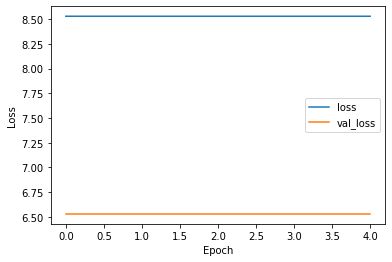

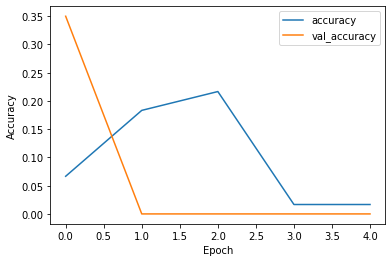

In [ ]:
model.plotHistory()

In [ ]:
batchSize = 32
model.evaluate(batchSize)

Evaluate on test data
1/1 [==============================] - 25s 25s/step - loss: 1.0700 - acc: 0.0000e+00


[1.0700000524520874, 0.0]

In [ ]:
model.printEvaluationResults()

loss: 1.0700000524520874
Accuracy: 0.0


In [ ]:
x = x_test[8].reshape(1,IMG_HEIGHT,IMG_WIDTH,IMG_DEPTH)
model.predict(x)

array([[0.10008052, 0.10006392, 0.10025751, 0.09964157, 0.09990147,
        0.09996206, 0.09984613, 0.10043062, 0.09969983, 0.10011631]],
      dtype=float32)

In [ ]:
model.printPredictionResults()

Predicted Class: 7
Prediction Probability: 0.100430615
predictionResult: [[0.10008052 0.10006392 0.10025751 0.09964157 0.09990147 0.09996206
  0.09984613 0.10043062 0.09969983 0.10011631]]
predictions shape: (1, 10)


In [ ]:
print(f'This image belongs to the class {model.predictedClass} with {model.predictionProbability} probability')

This image belongs to the class 7 with 0.10043061524629593 probability


In [ ]:
"""
print("")
print("")
saveModelToFile(model)

print("")
print("")
deleteModel(model)

print("")
print("")
model = loadModelFromFile()
"""

'\nprint("")\nprint("")\nsaveModelToFile(model)\n\nprint("")\nprint("")\ndeleteModel(model)\n\nprint("")\nprint("")\nmodel = loadModelFromFile()\n'

In [ ]:
# =============================================================================
# Select image as imageIndex
i = 0

# Get selected image name with full path
fileName = fileNameList[i]

fileFullName = fileFullNameList[i]
    
# Read image, resize and normalize
image = imageUtils.readImage(fileFullName, cv.IMREAD_GRAYSCALE)

resizedImage = imageUtils.resizeImage(image, IMG_HEIGHT, IMG_WIDTH)

normalizedImage = imageUtils.normalizeImage(resizedImage)
   
# Create input array
x = np.array(normalizedImage)
   
# Get expected class id
expectedClassId = labels_classID[i]

# Get expected class name
expectedClassName = labels_class[i]
    
# Predict with the trained model
x = x.reshape(1,IMG_HEIGHT,IMG_WIDTH,IMG_DEPTH)
model.predict(x)

# Print the prediction result
model.printPredictionResults()

# Find the predicted class
predicted_class = model.predictedClass

# Find the prediction probability
prediction_probability = model.predictionProbability

# Get predicted class id
predictedClassId = predicted_class

# Get predicted class name
predictedClassName = labels_class[predictedClassId]

print("")
print("")
print(f'expected  : This image belongs to the class {expectedClassId} , {expectedClassName}')
print("")
print("")
print(f'predicted : This image belongs to the class {predicted_class} with {prediction_probability} probability')
print("")
print("")
print('urban_sounds_data - classID : ', urban_sounds_data['classID'].unique()) 
print("")
print("")
print('urban_sounds_data - class : ', urban_sounds_data['class'].unique()) 
print("")
print("")
print(urban_sounds_data.head())
print("")
print("")

Predicted Class: 8
Prediction Probability: 0.14524394
predictionResult: [[0.11817079 0.10064445 0.0482134  0.11930909 0.06428543 0.10281133
  0.12952076 0.05433861 0.14524394 0.11746215]]
predictions shape: (1, 10)


expected  : This image belongs to the class 3 , dog_bark


predicted : This image belongs to the class 8 with 0.14524394273757935 probability


urban_sounds_data - classID :  [3 2 1 0 9 6 8 5 7 4]


urban_sounds_data - class :  ['dog_bark' 'children_playing' 'car_horn' 'air_conditioner' 'street_music'
 'gun_shot' 'siren' 'engine_idling' 'jackhammer' 'drilling']


      slice_file_name  classID             class
0    100032-3-0-0.png        3          dog_bark
1  100263-2-0-117.png        2  children_playing
2  100263-2-0-121.png        2  children_playing
3  100263-2-0-126.png        2  children_playing
4  100263-2-0-137.png        2  children_playing




In [ ]:
# drive.flush_and_unmount()
# print('All changes made in this colab session should now be visible in Drive.')